## Final Project: Forecast the Bacteria using Logistic Regression, Decision Tree, and Random Forest

Project Milestones

Complete project question and dataset (due by 09.07). Create a GitHub repository for your project. It should include a short write-up that answers these questions:

What is the question you hope to answer?
What data are you planning to use to answer that question?
What do you know about the data so far?
Why did you choose this topic?
Data Exploration and Analysis Plan (due by 09.21)

What data have you gathered, and how did you gather it?
Which areas of the data have you cleaned, and which areas still need cleaning?
What steps have you taken to explore the data?
What insights have you gained from your exploration?
Will you be able to answer your question with this data, or do you need to gather more data (or adjust your question)?
How might you use modeling to answer your question?
First Draft Review (due by 10.05)

At a minimum, you should include:
Narrative of what you have done so far and what you are still planning to do, ideally in a format similar to the format of your final project paper
Code, with lots of comments
Visualizations you have done
Slides (if you have started making them)
Data and data dictionary
Presentations (due by 10.12 & 10.17)

Deliver your project presentation in class, and submit all required deliverables (paper, slides, code, data, and data dictionary).

Project paper: any format (PDF, Markdown, etc.)
Presentation slides: any format (PDF, PowerPoint, Google Slides, etc.)
Code: commented Python scripts, and any other code you used in the project
Data: data files in "raw" or "processed" format
Data dictionary (aka "code book"): description of each variable, including units

What should you include in your slides:
Problem statement and hypothesis
Description of your data set and how it was obtained
Description of any pre-processing steps you took
What you learned from exploring the data, including visualizations
How you chose which features to use in your analysis
Details of your modeling process, including how you selected your models and validated them
Your challenges and successes
Possible extensions or business applications of your project
Conclusions and key learnings

## Load and Clean the Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn import metrics

import seaborn as sns
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [2]:
# 1. load Dataset from Excel file with Unit = CFU/ml omly
bdf = pd.read_excel('./BacteriaData2011-2016.xlsx')

# check head
bdf.head()

,LOT_NUMBER,MATERIAL_CODE,PROTOCOL_NAME,SAMPLE_DESC,SAMPLE_COLLECTION_DATE,COMPONENT,Organism Name,Total Count,UNITS
0,LA11A054,5% ALBUMIN IP,MOTHER,DF,2011-03-03 16:57:27,Organism Name,NaN,Unattainable,Genus Species
1,LA11C006,20% ALBUMIN IP,MOTHER,SU,2011-01-17 05:25:39,Total Count/mL,Ochrobactrum rhizosphaerae,2.6,CFU/mL
2,LA11E040,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-02-23 15:17:34,Total Count/mL,Unattainable,1.6,CFU/mL
3,LA11C016,20% ALBUMIN IP,MOTHER,CN,2011-02-25 03:29:00,Total Count/mL,Unattainable,12.2,CFU/mL
4,LA11D045,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-02-26 20:50:16,Total Count/mL,Unattainable,11.4,CFU/mL


In [3]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 9 columns):
LOT_NUMBER                389 non-null object
MATERIAL_CODE             389 non-null object
PROTOCOL_NAME             389 non-null object
SAMPLE_DESC               389 non-null object
SAMPLE_COLLECTION_DATE    389 non-null datetime64[ns]
COMPONENT                 389 non-null object
Organism Name             388 non-null object
Total Count               307 non-null object
UNITS                     389 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 27.4+ KB


In [4]:
#2 Pre-process Data
# Check the missing values
print "Missing values:"
print bdf.isnull().sum()
# drop missing values if there are any
if bdf.isnull().sum().sum():
    print "There are missing values"
    bdf = bdf.dropna()
    print "Missing values dropped"

Missing values:
LOT_NUMBER                 0
MATERIAL_CODE              0
PROTOCOL_NAME              0
SAMPLE_DESC                0
SAMPLE_COLLECTION_DATE     0
COMPONENT                  0
Organism Name              1
Total Count               82
UNITS                      0
dtype: int64
There are missing values
Missing values dropped


In [5]:
#Reset index after drop and Check data again
bdf.sort_values('SAMPLE_COLLECTION_DATE', inplace=True)
bdf.reset_index(drop=True, inplace=True)
bdf

,LOT_NUMBER,MATERIAL_CODE,PROTOCOL_NAME,SAMPLE_DESC,SAMPLE_COLLECTION_DATE,COMPONENT,Organism Name,Total Count,UNITS
0,LA11C006,20% ALBUMIN IP,MOTHER,SU,2011-01-17 05:25:39,Total Count/mL,Ochrobactrum rhizosphaerae,2.6,CFU/mL
1,LA11E040,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-02-23 15:17:34,Total Count/mL,Unattainable,1.6,CFU/mL
2,LA11C016,20% ALBUMIN IP,MOTHER,CN,2011-02-25 03:29:00,Total Count/mL,Unattainable,12.2,CFU/mL
3,LA11D045,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-02-26 20:50:16,Total Count/mL,Unattainable,11.4,CFU/mL
4,LA11B051,5% ALBUMIN IP,MOTHER,DF,2011-03-01 02:40:32,Total Count/mL,Unattainable,1.2,CFU/mL
5,LA11A054,5% ALBUMIN IP,MOTHER,DF,2011-03-03 16:57:27,Total Count/mL,Stenotrophomonas/Unattainable,18.4,CFU/mL
6,LA11D049,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-03-04 10:07:56,Total Count/mL,Unattainable,2,CFU/mL
7,LA11C018,20% ALBUMIN IP,MOTHER,CN,2011-03-08 11:14:22,Total Count/mL,Stenotrophomonas,100,CFU/mL
8,LA11C018,20% ALBUMIN IP,MOTHER,FS,2011-03-10 02:45:26,Total Count/mL,Unattainable,1,CFU/mL
9,LA11B058,5% ALBUMIN IP,5/5 SPLIT,FS,2011-03-11 17:49:53,Total Count/mL,Pseudomonas,7,CFU/mL


In [6]:
#Since the missing row 2 has a unattainable value, so the Total Count column type is object, change it to numeric
bdf['Total Count']=bdf['Total Count'].astype(float)
print bdf.dtypes

LOT_NUMBER                        object
MATERIAL_CODE                     object
PROTOCOL_NAME                     object
SAMPLE_DESC                       object
SAMPLE_COLLECTION_DATE    datetime64[ns]
COMPONENT                         object
Organism Name                     object
Total Count                      float64
UNITS                             object
dtype: object


In [7]:
# Add a column of bacteria organization count
print bdf['Organism Name'].head(10)
bdf['Organism Count'] = bdf['Organism Name'].map(lambda x: len(x.split('/')))
print bdf['Organism Count'].head(10)

0       Ochrobactrum rhizosphaerae
1                     Unattainable
2                     Unattainable
3                     Unattainable
4                     Unattainable
5    Stenotrophomonas/Unattainable
6                     Unattainable
7                 Stenotrophomonas
8                     Unattainable
9                      Pseudomonas
Name: Organism Name, dtype: object
0    1
1    1
2    1
3    1
4    1
5    2
6    1
7    1
8    1
9    1
Name: Organism Count, dtype: int64


In [8]:
# add DOW & DOM
bdf['Week Day'] = bdf['SAMPLE_COLLECTION_DATE'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
bdf['Month'] = bdf['SAMPLE_COLLECTION_DATE'].map(lambda x: x.month)
bdf['Month'] = bdf['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bdf.head()

,LOT_NUMBER,MATERIAL_CODE,PROTOCOL_NAME,SAMPLE_DESC,SAMPLE_COLLECTION_DATE,COMPONENT,Organism Name,Total Count,UNITS,Organism Count,Week Day,Month
0,LA11C006,20% ALBUMIN IP,MOTHER,SU,2011-01-17 05:25:39,Total Count/mL,Ochrobactrum rhizosphaerae,2.6,CFU/mL,1,Mon,Jan
1,LA11E040,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-02-23 15:17:34,Total Count/mL,Unattainable,1.6,CFU/mL,1,Wed,Feb
2,LA11C016,20% ALBUMIN IP,MOTHER,CN,2011-02-25 03:29:00,Total Count/mL,Unattainable,12.2,CFU/mL,1,Fri,Feb
3,LA11D045,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-02-26 20:50:16,Total Count/mL,Unattainable,11.4,CFU/mL,1,Sat,Feb
4,LA11B051,5% ALBUMIN IP,MOTHER,DF,2011-03-01 02:40:32,Total Count/mL,Unattainable,1.2,CFU/mL,1,Tues,Mar


## Exploratory Data Analysis

In [9]:
#Descriptive Statistics for numerical fields 
bdf.describe()

,Total Count,Organism Count
count,306.000000,306.000000
mean,22.967320,1.241830
std,57.007089,0.567146
min,0.000000,1.000000
25%,1.400000,1.000000
50%,3.100000,1.000000
75%,11.700000,1.000000
max,249.800000,5.000000


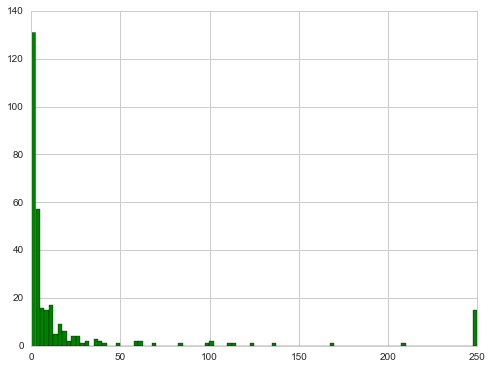

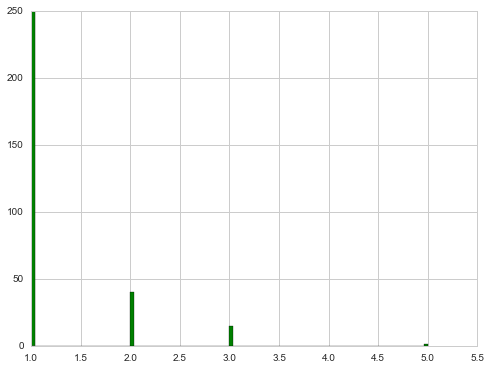

In [10]:
#Detect the outliers: Total Count = 249.800000 and Organism Count = 5
bdf['Total Count'].hist(figsize=(8,6), bins=100, color='g')
fig=plt.figure()
bdf['Organism Count'].hist(figsize=(8,6), bins=100, color='g')

Explain the outliers ???

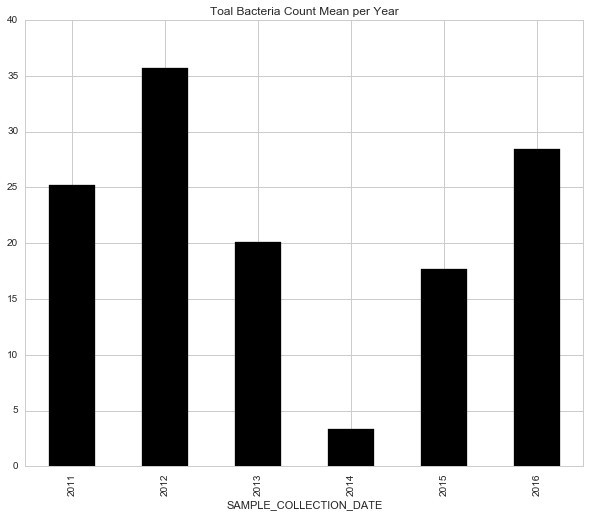

In [11]:
# start with average total count per year (Notice 2014 low average)
bdf.groupby(bdf['SAMPLE_COLLECTION_DATE'].dt.year)['Total Count']\
.mean().plot(kind='bar', figsize=(10,8), color='k', title='Toal Bacteria Count Mean per Year')

In [12]:
#Year 2011 Total Count > 10 analysis (25 results are contaminated, 25/306=8%)
bdf[(bdf['SAMPLE_COLLECTION_DATE']>='2011-01-01')&(bdf['SAMPLE_COLLECTION_DATE']<'2012-01-01')&(bdf['Total Count']>10)]\
['Total Count'].describe()

count     25.000000
mean      72.760000
std       93.946918
min       10.400000
25%       14.200000
50%       19.000000
75%      100.000000
max      249.800000
Name: Total Count, dtype: float64

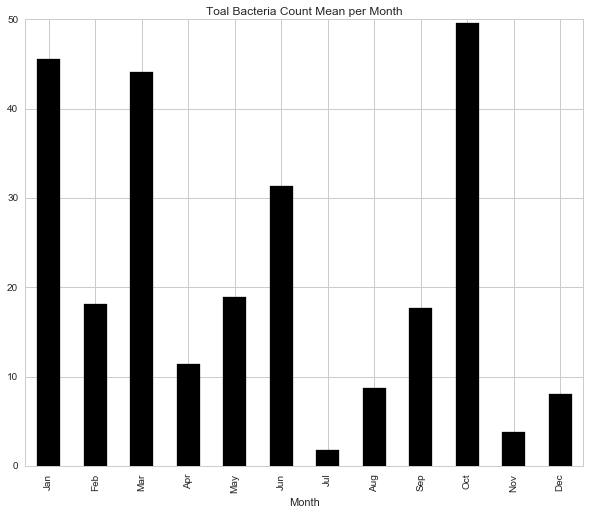

In [13]:
# start with average total count in month (Notice low average in April, July, August, November, December )
bdf.groupby(bdf['Month'],sort=False)['Total Count']\
.mean().plot(kind='bar', figsize=(10,8), color='k', title='Toal Bacteria Count Mean per Month')

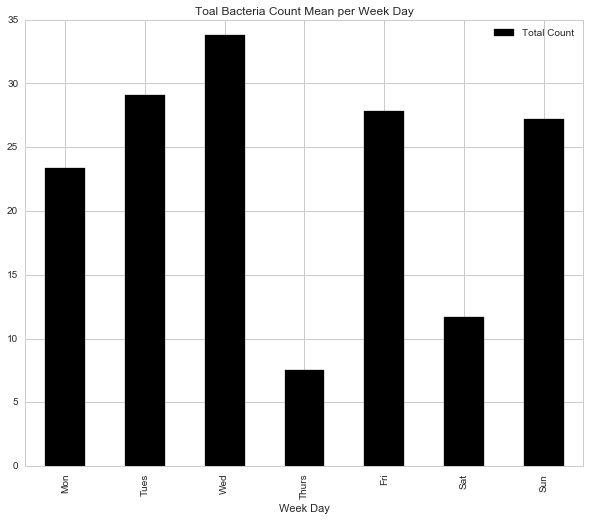

In [14]:
# start with average total count in week day (Notice low average in Thursday )
weekday = pd.DataFrame(bdf.groupby(bdf['Week Day'])['Total Count'].mean())
weekday=weekday.rename(index={'Mon':0, 'Tues':1, 'Wed':2, 'Thurs':3, 'Fri':4, 'Sat':5, 'Sun':6})
weekday=weekday.sort_index()
weekday=weekday.rename(index={0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
#weekday
weekday.plot(kind='bar', figsize=(10,8), color='k', title='Toal Bacteria Count Mean per Week Day')

Explain ???

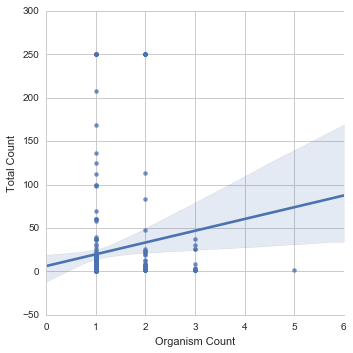

In [15]:
#Check the relation between Organism Count and Total Count
sns.lmplot('Organism Count', 'Total Count', bdf)

No linear relationship between the two.

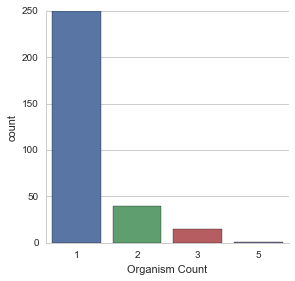

In [16]:
sns.factorplot('Organism Count', data=bdf, kind='count')

Explain ???

### Feature Engineering: Add new info ???

In [17]:
bdf.columns

Index([            u'LOT_NUMBER',          u'MATERIAL_CODE',
                u'PROTOCOL_NAME',            u'SAMPLE_DESC',
       u'SAMPLE_COLLECTION_DATE',              u'COMPONENT',
                u'Organism Name',            u'Total Count',
                        u'UNITS',         u'Organism Count',
                     u'Week Day',                  u'Month'],
      dtype='object')

## 1. Binary classification with logistic regression

In [18]:
# Patsy also adds an intercept column. This is a column of 1s that is needed for regression models to function properly.
# So no dummy variables are needed
from patsy import dmatrix
X = dmatrix('Month + Q("Week Day") + Q("MATERIAL_CODE") + Q("PROTOCOL_NAME") + Q("SAMPLE_DESC") +\
Q("COMPONENT") + Q("Organism Name") + Q("Organism Count")', data=bdf, return_type='dataframe')
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Organism Name"")[T.Rhodotorula]","Q(""Organism Name"")[T.Sarocladium]","Q(""Organism Name"")[T.Serratia]","Q(""Organism Name"")[T.Serratia/Stenotrophomonas]","Q(""Organism Name"")[T.Staphylococcus]","Q(""Organism Name"")[T.Staphylococcus aphidis]","Q(""Organism Name"")[T.Stenotrophomonas]","Q(""Organism Name"")[T.Stenotrophomonas/Unattainable]","Q(""Organism Name"")[T.Unattainable]","Q(""Organism Count"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
bdf[50:100]

,LOT_NUMBER,MATERIAL_CODE,PROTOCOL_NAME,SAMPLE_DESC,SAMPLE_COLLECTION_DATE,COMPONENT,Organism Name,Total Count,UNITS,Organism Count,Week Day,Month
50,LA11B224,5% ALBUMIN IP,MOTHER,DF,2011-08-28 02:20:09,SDA-Total Count/mL,Unattainable,4.6,CFU/mL,1,Sun,Aug
51,LA11B224,5% ALBUMIN IP,MOTHER,DF,2011-08-28 02:20:09,TSA-Total Count/mL,Unattainable,2.6,CFU/mL,1,Sun,Aug
52,LA11E167,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-09-05 22:42:40,SDA-Total Count/mL,Unattainable,3.0,CFU/mL,1,Mon,Sep
53,LA11E167,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-09-05 22:42:40,TSA-Total Count/mL,Unattainable,7.4,CFU/mL,1,Mon,Sep
54,LA11D166,25% ALBUMIN IP,SUPERBULK TARGET 8.5,CN,2011-09-08 21:32:22,TSA-Total Count/mL,Bacillus,17.2,CFU/mL,1,Thurs,Sep
55,LA11D166,25% ALBUMIN IP,SUPERBULK TARGET 8.5,CN,2011-09-08 21:32:22,SDA-Total Count/mL,Bacillus,40.0,CFU/mL,1,Thurs,Sep
56,LA11C074,20% ALBUMIN IP,MOTHER FLEX EU,SU,2011-09-09 04:33:05,SDA-Total Count/mL,Unattainable,1.0,CFU/mL,1,Fri,Sep
57,LA11A236,5% ALBUMIN IP,MOTHER,FS,2011-09-15 07:21:45,SDA-Total Count/mL,Pseudomonas,1.8,CFU/mL,1,Thurs,Sep
58,LA11A236,5% ALBUMIN IP,MOTHER,FS,2011-09-15 07:21:45,TSA-Total Count/mL,Unattainable,2.4,CFU/mL,1,Thurs,Sep
59,LA11A237,5% ALBUMIN IP,5/5 SPLIT,FS,2011-09-15 13:57:24,SDA-Total Count/mL,Pseudomonas/Staphylococcus,2.8,CFU/mL,2,Thurs,Sep


In [20]:
# 78 is the first index of 2012 data - data is date sorted
# 2011 data is used for the training (Total Count > 10 is contaminated 
# - decrease the threshhold will decrease the accuracy, but increace the True Positive Rate)
X_train, X_test = X[:78], X[78:]
y_train = bdf['Total Count'][:78].map(lambda x: 1 if x >= 10 else 0)
y_test = bdf['Total Count'][78:].map(lambda x: 1 if x >= 10 else 0)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


(0, 15)

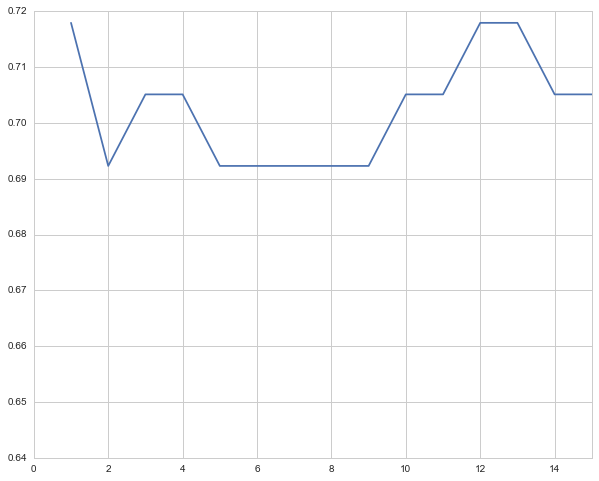

In [21]:
# FInd the best C for the Linear Logistic Model using Grid Search
from sklearn import grid_search

# set list of values to grid search over
c = range(1, 150)
params = {'C': c}

# perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=linear_model.LogisticRegression(),
    param_grid=params)
gs.fit(X_train, y_train)

# get best value to use
print gs.best_estimator_

# plot search values vs. grid scores
plt.figure(figsize=(10,8))
plt.plot(c, [s[1] for s in gs.grid_scores_])
plt.xlim((0,15))

In [22]:
# Logistic regression using default C=1
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Evaluate accuracy of model on test set
print "Accuracy: %0.3f" % clf.score(X_test, y_test)
# Evaluate ROC AUC score of model on test set
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

Accuracy: 0.702
ROC AUC: 0.683


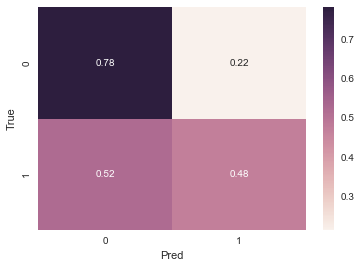

[[131  36]
 [ 32  29]]


In [24]:
# Get confusion matrix on test set

y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

Explain ???

In [25]:
#Find out the important features
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.244703,"Q(""Organism Name"")[T.Bacillus]"
1,0.668252,"Q(""Week Day"")[T.Sun]"
2,0.620777,Month[T.Feb]
3,0.579319,"Q(""Organism Name"")[T.Bacillus/Stenotrophomonas]"
4,0.575455,"Q(""Organism Name"")[T.Pseudomonas]"
5,0.510701,Month[T.Dec]
6,0.453907,"Q(""Organism Name"")[T.Stenotrophomonas]"
7,0.446585,Month[T.Mar]
8,0.391744,"Q(""Organism Name"")[T.Stenotrophomonas/Unattain..."
9,0.389550,"Q(""Week Day"")[T.Wed]"


For categorical features, a positive sign on the feature' coefficient tells us that when present, this feature increases the probability of a positive outcome versus the baseline. For continuous features, a positive sign tells us that an increase in the value of this feature corresponds to an increase in the probability of a positive outcome. The size of the coefficient tells us the magnitude of the increase in probability. Let's examine this by looking at the days of the week:

In [26]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.930680,"Q(""Week Day"")[T.Mon]"
13,0.063612,"Q(""Week Day"")[T.Sat]"
14,0.668252,"Q(""Week Day"")[T.Sun]"
15,-0.409859,"Q(""Week Day"")[T.Thurs]"
16,-1.053174,"Q(""Week Day"")[T.Tues]"
17,0.389550,"Q(""Week Day"")[T.Wed]"


Explain: Tuesday is the worst ???

In [27]:
# our baseline 
#Baseline analysis for test data
bdf[(bdf['SAMPLE_COLLECTION_DATE']>='2012-01-01')&(bdf['Total Count']>10)]\
['Total Count'].describe()

count     60.000000
mean      76.426667
std       87.820074
min       10.600000
25%       16.600000
50%       28.400000
75%      103.400000
max      249.800000
Name: Total Count, dtype: float64

In [28]:
def predicted_vs_actual_df():
    pred_label = clf.predict(X_test)
    results=[]
    for predicted_label, trained_label, idx, chg in zip(pred_label, y_test, y_test.index, bdf.ix[y_test.index]['Total Count']):
        if predicted_label == trained_label:
            results.append([idx, chg, predicted_label, trained_label, 1])
        else:
            results.append([idx, chg, predicted_label, trained_label, 0])
    return pd.DataFrame(results, columns=['index', 'Total Count', 'predicted', 'actual', 'correct'])

rf = predicted_vs_actual_df()
rf

,index,Total Count,predicted,actual,correct
0,78,23.6,1,1,1
1,79,7.8,1,0,0
2,80,60.0,1,1,1
3,81,60.0,1,1,1
4,82,2.2,0,0,1
5,83,249.8,0,1,0
6,84,249.8,0,1,0
7,85,1.0,0,0,1
8,86,5.6,0,0,1
9,87,6.8,0,0,1


In [29]:
rf[rf['predicted']==1]['Total Count'].describe()

count     65.000000
mean      31.858462
std       62.872587
min        0.000000
25%        1.600000
50%        7.800000
75%       23.600000
max      249.800000
Name: Total Count, dtype: float64

### Model evaluation

From Logstic Regression, we can see about 71% of our predictions were accurate. ???

Let's look at a plot of our returns:

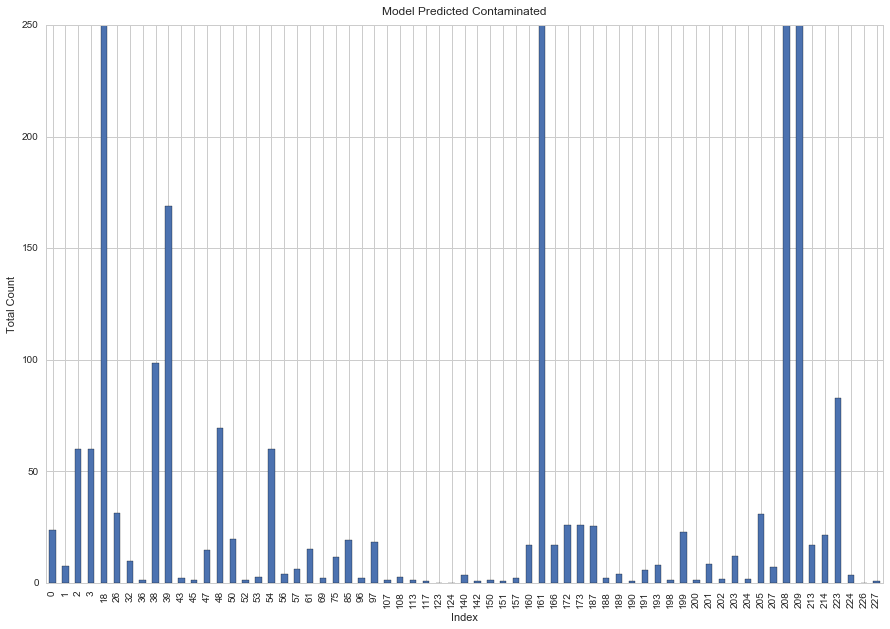

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['Total Count'].plot(kind='bar')
ax.set_title('Model Predicted Contaminated', y=1.01)
ax.set_ylabel('Total Count')
ax.set_xlabel('Index')

Explain ???

In [31]:
#Adjust model by change the threshhold from 10 to 12
X_train, X_test = X[:78], X[78:]
y_train = bdf['Total Count'][:78].map(lambda x: 1 if x >= 12 else 0)
y_test = bdf['Total Count'][78:].map(lambda x: 1 if x >= 12 else 0)
clf = linear_model.LogisticRegression(C=1)
clf.fit(X_train, y_train)

# Evaluate accuracy of model on test set
print "Accuracy: %0.3f" % clf.score(X_test, y_test)
# Evaluate ROC AUC score of model on test set
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

Accuracy: 0.754
ROC AUC: 0.730


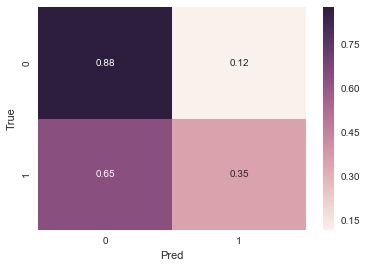

[[153  21]
 [ 35  19]]


In [32]:
# Get confusion matrix on test set

y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

In [33]:
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, bdf.ix[y_test.index]['Total Count']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', 'Total Count', 'predicted', 'actual', 'correct'])
rf[rf['predicted']==1]['Total Count'].describe()

count     40.000000
mean      43.430000
std       76.768577
min        0.000000
25%        1.750000
50%       10.700000
75%       30.900000
max      249.800000
Name: Total Count, dtype: float64

??? Looking at the results, our accuracy increased from 0.684 to 0.768, our mean decrased from 76 to 51. However, our count went from 55 to 33, and we're still far above the baseline approach. Let's do one more test. 
???Let's now use 2016 data as our training data:

In [34]:
bdf[250:]

,LOT_NUMBER,MATERIAL_CODE,PROTOCOL_NAME,SAMPLE_DESC,SAMPLE_COLLECTION_DATE,COMPONENT,Organism Name,Total Count,UNITS,Organism Count,Week Day,Month
250,LA15C113,20% ALBUMIN IP,8.5%_F NITROGEN,CN,2015-12-09 02:16:45,TSA-Total Count/mL,Chryseobacterium/Microbacterium/Serratia,26.0,CFU/mL,3,Wed,Dec
251,LA15D165,25% ALBUMIN IP,8.5%_F NITROGEN,CN,2015-12-11 20:10:32,TSA-Total Count/mL,Chryseobacterium/Microbacterium/Pseudomonas,25.8,CFU/mL,3,Fri,Dec
252,LA15D166,25% ALBUMIN IP,8.5%_F NITROGEN,CN,2015-12-12 12:00:01,TSA-Total Count/mL,Unattainable,1.6,CFU/mL,1,Sat,Dec
253,LA15D163,25% ALBUMIN IP,8.5%_F BIURET,CN,2015-12-14 07:56:44,TSA-Total Count/mL,Unattainable,15.4,CFU/mL,1,Mon,Dec
254,LA15D167,25% ALBUMIN IP,8.5%_F NITROGEN,CN,2015-12-14 18:06:51,TSA-Total Count/mL,Unattainable,1.4,CFU/mL,1,Mon,Dec
255,LA15D164,25% ALBUMIN IP,8.5%_F BIURET,CN,2015-12-16 15:29:08,TSA-Total Count/mL,Unattainable,8.4,CFU/mL,1,Wed,Dec
256,LA15D169,25% ALBUMIN IP,8.5%_F NITROGEN,CN,2015-12-21 03:36:38,TSA-Total Count/mL,Microbacterium/Pseudomonas/Serratia,37.8,CFU/mL,3,Mon,Dec
257,LA15C115,20% ALBUMIN IP,8.5%_F BIURET,SU,2015-12-21 05:56:51,TSA-Total Count/mL,Microbacterium/Rhodococcus,1.4,CFU/mL,2,Mon,Dec
258,LA15D171,25% ALBUMIN IP,8.5%_F NITROGEN,CN,2015-12-23 12:22:58,TSA-Total Count/mL,Unattainable,8.6,CFU/mL,1,Wed,Dec
259,LA15D178,25% ALBUMIN IP,8.5%_F NITROGEN,CN,2015-12-25 19:31:40,TSA-Total Count/mL,Unattainable,1.2,CFU/mL,1,Fri,Dec


In [35]:
#Adjust model by using 2016 data as the trainning data set
X_train, X_test = X[263:], X[:263]
y_train = bdf['Total Count'][263:].map(lambda x: 1 if x >= 12 else 0)
y_test = bdf['Total Count'][:263].map(lambda x: 1 if x >= 12 else 0)
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate accuracy of model on test set
print "Accuracy: %0.3f" % clf.score(X_test, y_test)
# Evaluate ROC AUC score of model on test set
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

Accuracy: 0.711
ROC AUC: 0.506


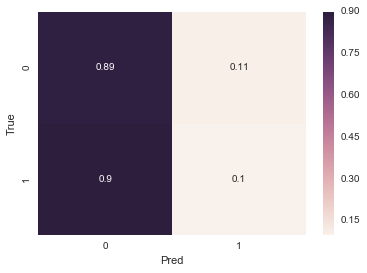

[[181  22]
 [ 54   6]]


In [36]:
# Get confusion matrix on test set

y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

In [37]:
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, bdf.ix[y_test.index]['Total Count']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', 'Total Count', 'predicted', 'actual', 'correct'])
rf[rf['predicted']==1]['Total Count'].describe()

count     28.000000
mean      23.257143
std       64.177274
min        1.400000
25%        2.600000
50%        3.600000
75%        9.300000
max      249.800000
Name: Total Count, dtype: float64

With the 2016 as our trainning data, we can see that our mean dropped from 51 to 14, but the model continues to appear better than the naive approach???
??? Looking at the results, our accuracy decreased from 0.768 to 0.707, our mean decrased from 51 to 14. However, our count went from 33 to 27, and we're still far above the baseline approach. Let's do one more test. 


In [38]:
#Find out the important features
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.229795,"Q(""Organism Name"")[T.Microbacterium]"
1,0.720266,"Q(""Organism Name"")[T.Microbacterium/Stenotroph..."
2,0.549465,"Q(""PROTOCOL_NAME"")[T.6.5%_FL NITROGEN]"
3,0.406424,"Q(""COMPONENT"")[T.TSA-Total Count/mL]"
4,0.307529,"Q(""Week Day"")[T.Sat]"
5,0.268813,Month[T.Mar]
6,0.213831,"Q(""Week Day"")[T.Tues]"
7,0.189114,"Q(""PROTOCOL_NAME"")[T.8.5%_F NITROGEN TRU]"
8,0.139738,"Q(""PROTOCOL_NAME"")[T.6.5%_B NITROGEN]"
9,0.102767,"Q(""Organism Count"")"


In [39]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.551626,"Q(""Week Day"")[T.Mon]"
13,0.307529,"Q(""Week Day"")[T.Sat]"
14,0.034288,"Q(""Week Day"")[T.Sun]"
15,-0.436772,"Q(""Week Day"")[T.Thurs]"
16,0.213831,"Q(""Week Day"")[T.Tues]"
17,-0.320055,"Q(""Week Day"")[T.Wed]"


Explain ???

In [40]:
#Use the important feature with total count > 10 threshole
bdf[bdf['Organism Name'].str.contains('Bacillus')]

,LOT_NUMBER,MATERIAL_CODE,PROTOCOL_NAME,SAMPLE_DESC,SAMPLE_COLLECTION_DATE,COMPONENT,Organism Name,Total Count,UNITS,Organism Count,Week Day,Month
12,LA11D052,25% ALBUMIN IP,SUPERBULK TARGET 8.5,CN,2011-03-17 15:36:09,Total Count/mL,Bacillus/Stenotrophomonas,23.2,CFU/mL,2,Thurs,Mar
13,LA11D056,25% ALBUMIN IP,SUPERBULK TARGET 8.5,CN,2011-03-21 22:54:43,Total Count/mL,Bacillus,249.8,CFU/ML,1,Mon,Mar
15,LA11D053,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-03-25 11:32:10,Total Count/mL,Bacillus/Stenotrophomonas,249.8,CFU/ML,2,Fri,Mar
18,LA11B099,5% ALBUMIN IP,MOTHER,DF,2011-04-27 07:14:51,Total Count/mL,Bacillus,15.0,CFU/mL,1,Wed,Apr
28,LA11C036,20% ALBUMIN IP,MOTHER,CN,2011-05-20 15:27:00,Total Count/mL,Bacillus,249.8,CFU/mL,1,Fri,May
36,LA11E121,25% ALBUMIN IP,MOTHER FLEX NON EU,CN,2011-06-19 00:50:09,Total Count/mL,Bacillus/Stenotrophomonas,249.8,CFU/mL,2,Sun,Jun
54,LA11D166,25% ALBUMIN IP,SUPERBULK TARGET 8.5,CN,2011-09-08 21:32:22,TSA-Total Count/mL,Bacillus,17.2,CFU/mL,1,Thurs,Sep
55,LA11D166,25% ALBUMIN IP,SUPERBULK TARGET 8.5,CN,2011-09-08 21:32:22,SDA-Total Count/mL,Bacillus,40.0,CFU/mL,1,Thurs,Sep
83,LA12D014,25% ALBUMIN IP,SUPERBULK TARGET 8.5,CN,2012-01-16 09:08:42,TSA-Total Count/mL,Bacillus/Stenotrophomonas,249.8,CFU/mL,2,Mon,Jan
84,LA12D014,25% ALBUMIN IP,SUPERBULK TARGET 8.5,CN,2012-01-16 09:08:42,SDA-Total Count/mL,Bacillus/Stenotrophomonas,249.8,CFU/mL,2,Mon,Jan


Our top two features represent a sum total of 13 Orgamization Names. This is why it is difficult to extract this information from logistic regression models, especially ones of this complexity.

We can utilize another models known as decision tree and random forest classifier to get our importance measures. It should give similar results to the logistic regression model but in addition, it will provide a very nice summary of which features have the highest influence on a positive outcome.
Using the same training and test data as earlier, we'll fit the decision tree and random forest classifier:

## 2. Binary classification with Random Forest

Best Params:
{'n_estimators': 300}
Accuracy using best param: 0.756


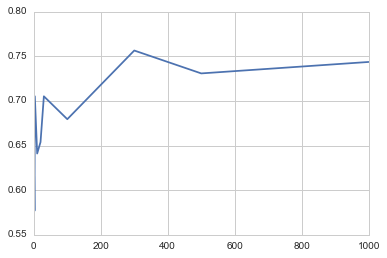

In [41]:
#Use the 2011 year as the trainning 
X_train, X_test = X[:78], X[78:]
y_train = bdf['Total Count'][:78].map(lambda x: 1 if x >= 10 else 0)
y_test = bdf['Total Count'][78:].map(lambda x: 1 if x >= 10 else 0)

# Find the best n for the random forest using the Grid search
# Set list of values to grid search over
n = [1, 2, 3, 10, 20, 30, 100, 200, 300, 500, 1000]
params = {'n_estimators': n}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train)

# Get best value to use
print "Best Params:"
print gs.best_params_
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])

In [42]:
#Use n_estimators=200
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf.fit(X_train, y_train)

# Evaluate accuracy of model on test set
print "Accuracy: %0.3f" % clf_rf.score(X_test, y_test)
# Evaluate ROC AUC score of model on test set
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1])

Accuracy: 0.741
ROC AUC: 0.697


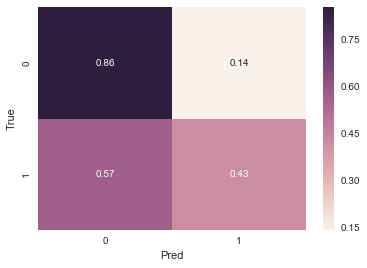

Confusion Matrix:
[[143  24]
 [ 35  26]]


In [43]:
# Get confusion matrix on test set
y_pred = clf_rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

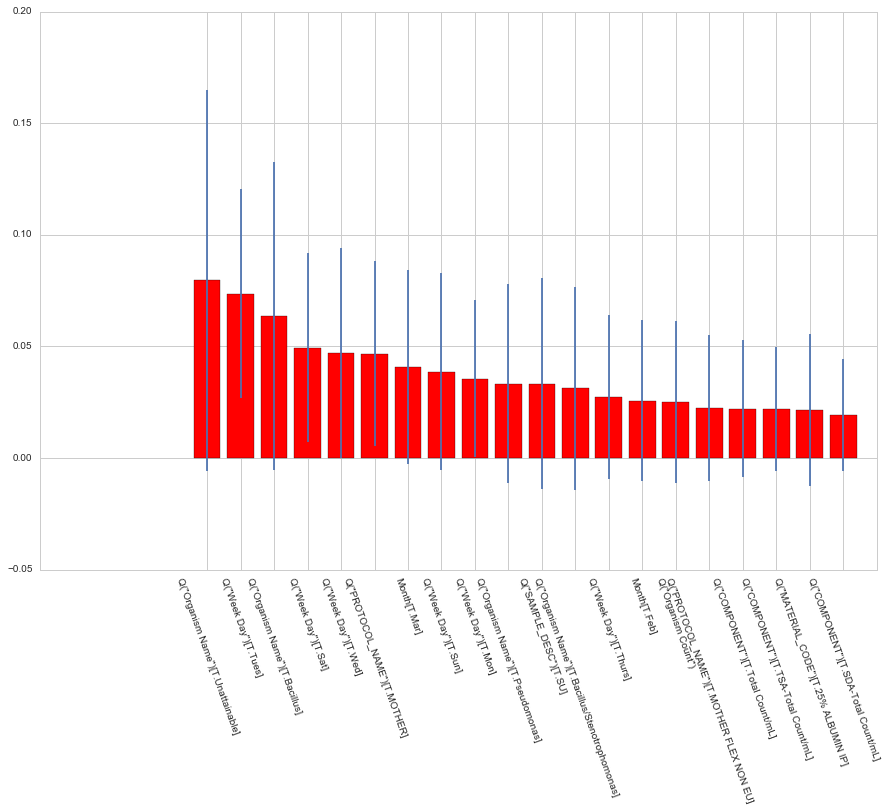

In [44]:
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)
imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]
plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);

The output from this gives us a ranked list of feature importance along with error bars for each. Looking at the list, these rankings would seem to make sense with ???.

## 3. Binary classification with Decision Tree

Using the same training and test data as earlier, we'll fit the decision tree classifier:

In [45]:
#Find best tree depth
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score

# list of values to try
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_train, y_train, cv=14, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

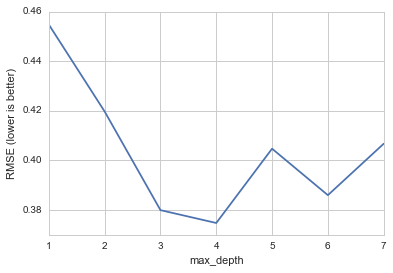

In [46]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [47]:
#Set tree max_depth=6 to avoid over fitting
clf_tree = DecisionTreeClassifier(max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

# Evaluate accuracy of model on test set
print "Accuracy: %0.3f" % clf_tree.score(X_test, y_test)
# Evaluate ROC AUC score of model on test set
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, clf_tree.predict_proba(X_test)[:,1])

Accuracy: 0.711
ROC AUC: 0.724


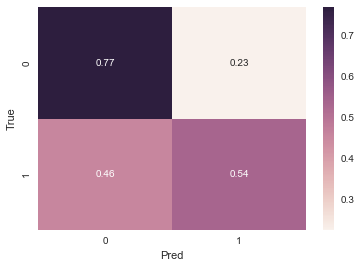

Confusion Matrix:
[[129  38]
 [ 28  33]]


In [48]:
# Get confusion matrix on test set
y_pred = clf_tree.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

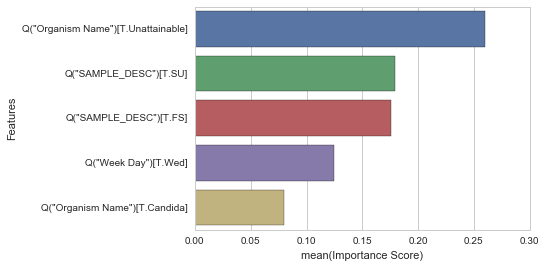

In [49]:
# Plot importances for all features
features = X.columns
feature_importances = clf_tree.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

#Convert from Uni-code to ASCII code for the Importance Score 
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')
import_df = features_df.head()

sns.barplot(y='Features', x='Importance Score', data=import_df)

In [63]:
features_df=pd.DataFrame({'feature':features, 'Importance Score':feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)
features_df.head()

,Importance Score,feature
101,0.259575,"Q(""Organism Name"")[T.Unattainable]"
49,0.179717,"Q(""SAMPLE_DESC"")[T.SU]"
47,0.176121,"Q(""SAMPLE_DESC"")[T.FS]"
17,0.124624,"Q(""Week Day"")[T.Wed]"
64,0.079755,"Q(""Organism Name"")[T.Candida]"


In [57]:
pd.DataFrame({'feature':features, 'importance':clf_tree.feature_importances_})

,feature,importance
0,Intercept,0.000000
1,Month[T.Aug],0.000000
2,Month[T.Dec],0.000000
3,Month[T.Feb],0.075268
4,Month[T.Jan],0.000000
5,Month[T.Jul],0.000000
6,Month[T.Jun],0.000000
7,Month[T.Mar],0.000000
8,Month[T.May],0.000000
9,Month[T.Nov],0.000000


In [50]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, out_file='bacteria_decision_tree.dot', feature_names=X.columns)

# At the command line, run this to convert to PNG:
#   dot -Tpng bacteria_decision_tree.dot -o tree_bacteria.png

In [51]:
!dot -Tpng bacteria_decision_tree.dot -o bacteria_decision_tree.png

## Conclusion ???
1. Linear Logistic model has the difficulty to extract the individual information from logistic regression models, especially ones of this complexity.

2. Decision tree accuracy is not as good as the random forest because of the complexity of the problem

3. Random tree can gives us a ranked list of feature importance along with error bars for each. Looking at the list, these rankings would seem to make sense with gap opening percentage and dollar change from opening leading the pack.